In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries and dataset

We have to predict rings of abalon

In [187]:
df=pd.read_csv("C:/Users/Lenovo/Desktop/dataset/abalon.csv",header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [188]:
df.columns=['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

In [189]:
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


checking null values

In [191]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

In [192]:
df.describe()#stastistical analysis

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Though the sex column is catagory variable,so we have to make it encoding by using labelencoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [193]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [194]:
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


checking skewness in the dataset

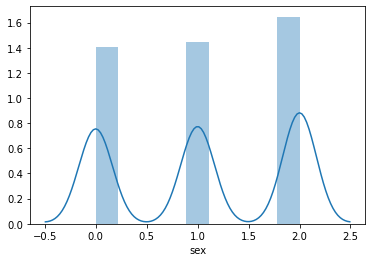

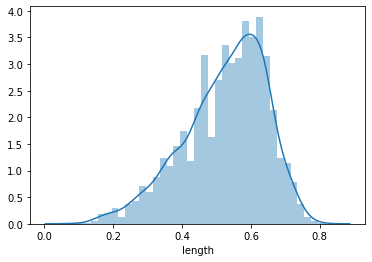

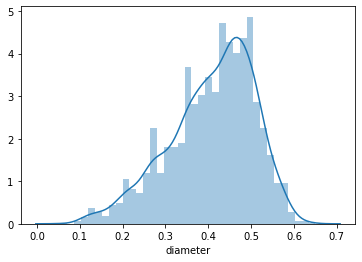

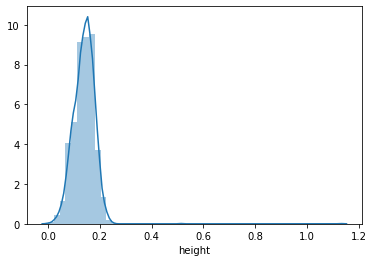

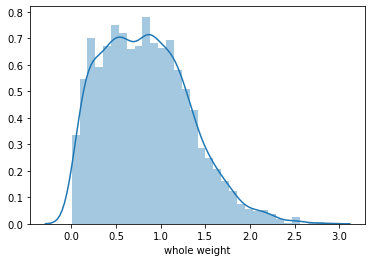

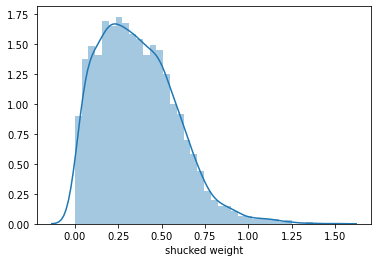

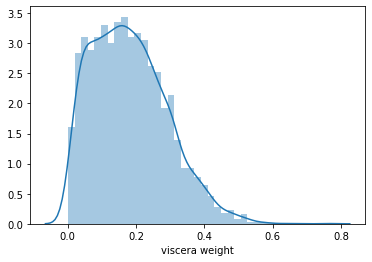

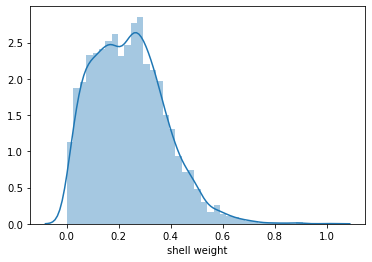

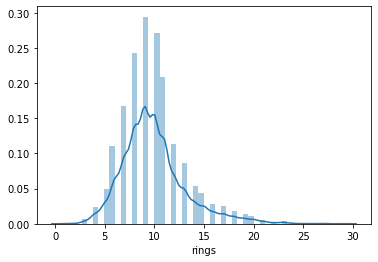

In [195]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [196]:
df.skew()

sex              -0.098155
length           -0.639873
diameter         -0.609198
height            3.128817
whole weight      0.530959
shucked weight    0.719098
viscera weight    0.591852
shell weight      0.620927
rings             1.114102
dtype: float64

checking outlier in the dataset

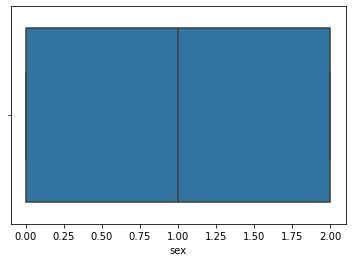

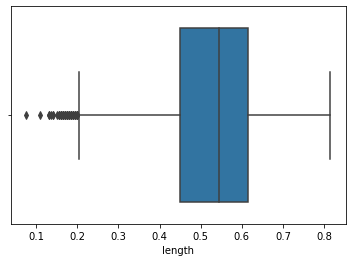

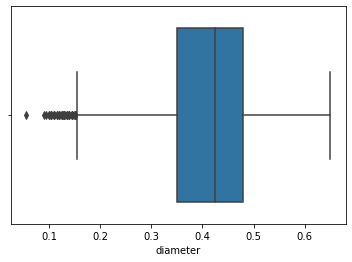

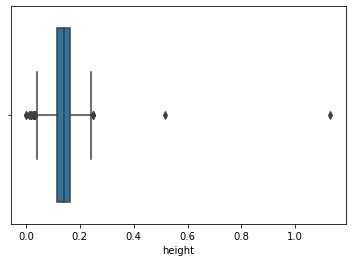

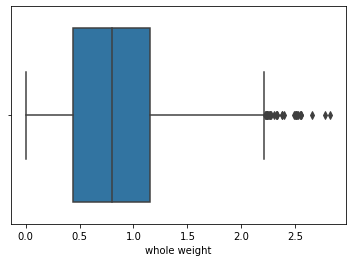

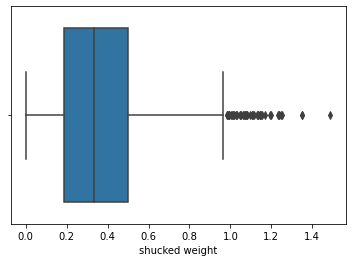

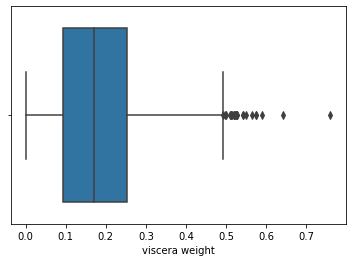

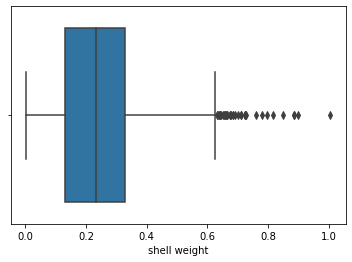

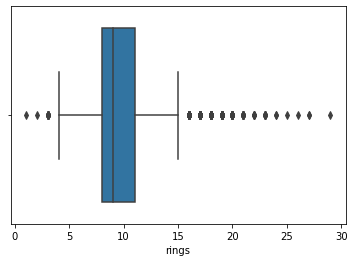

In [197]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

Though outlier is present in the dataset,we have to remove it using zscore

In [198]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [199]:
df_new.shape

(4027, 9)

In [200]:
df_new.skew()

sex              -0.094886
length           -0.623076
diameter         -0.598650
height           -0.244251
whole weight      0.334204
shucked weight    0.458295
viscera weight    0.437116
shell weight      0.349471
rings             0.725464
dtype: float64

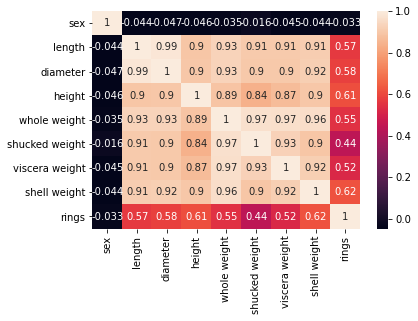

In [201]:
corr=df_new.corr()
sns.heatmap(corr,annot=True)

though outlier and skewness is removed from the dataset.we have to split dataset in x&y for further usecase

In [202]:
x=df_new.drop('rings',axis=1)
y=df_new['rings']

In [203]:
x

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [204]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 4027, dtype: int64

though all the datapoints are in same range so we dont need to do scaling of the dataset

In [205]:
x=df1

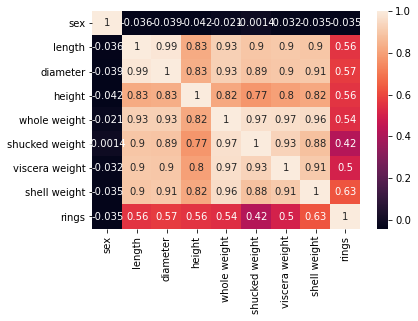

In [206]:
sns.heatmap(df.corr(),annot=True)

we have to find best random_state for best accuracy_model

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [208]:
maxacc=0
maxrs=i
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random_state",maxrs)

best accuracy score is 0.2369727047146402 on random_state 28


In [210]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=28)

In [211]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.23325062034739455
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.29      0.31         7
           5       0.57      0.32      0.41        25
           6       0.32      0.31      0.31        62
           7       0.28      0.29      0.29        78
           8       0.30      0.29      0.29       104
           9       0.28      0.32      0.30       129
          10       0.25      0.24      0.25       137
          11       0.19      0.16      0.17        88
          12       0.09      0.10      0.10        50
          13       0.09      0.12      0.11        41
          14       0.11      0.08      0.10        24
          15       0.07      0.12      0.09        17
          16       0.17      0.21      0.19        14
          17       0.08      0.07      0.07        15
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8

    ac

In [212]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.2630272952853598
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.50      0.32      0.39        25
           6       0.27      0.19      0.23        62
           7       0.29      0.41      0.34        78
           8       0.27      0.36      0.31       104
           9       0.25      0.44      0.32       129
          10       0.25      0.31      0.28       137
          11       0.25      0.26      0.25        88
          12       0.00      0.00      0.00        50
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8

    acc

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
y_pred=gd.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.2642679900744417
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.43      0.46         7
           5       0.58      0.44      0.50        25
           6       0.36      0.26      0.30        62
           7       0.28      0.36      0.31        78
           8       0.30      0.39      0.34       104
           9       0.30      0.34      0.32       129
          10       0.22      0.24      0.23       137
          11       0.24      0.27      0.26        88
          12       0.15      0.08      0.10        50
          13       0.17      0.10      0.12        41
          14       0.00      0.00      0.00        24
          15       0.06      0.06      0.06        17
          16       0.17      0.07      0.10        14
          17       0.25      0.13      0.17        15
          18       0.00      0.00      0.00         6
          19       0.33      0.12      0.18         8

    acc

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.24441687344913152
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.29      0.33         7
           5       0.46      0.44      0.45        25
           6       0.36      0.34      0.35        62
           7       0.26      0.38      0.31        78
           8       0.24      0.30      0.27       104
           9       0.26      0.34      0.30       129
          10       0.22      0.24      0.23       137
          11       0.20      0.22      0.21        88
          12       0.08      0.04      0.05        50
          13       0.04      0.02      0.03        41
          14       0.17      0.04      0.07        24
          15       0.00      0.00      0.00        17
          16       0.50      0.07      0.12        14
          17       0.33      0.07      0.11        15
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8

    ac

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.2506203473945409
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.43      0.46         7
           5       0.59      0.40      0.48        25
           6       0.37      0.27      0.31        62
           7       0.30      0.40      0.34        78
           8       0.28      0.34      0.31       104
           9       0.25      0.30      0.27       129
          10       0.24      0.28      0.26       137
          11       0.17      0.20      0.19        88
          12       0.16      0.08      0.11        50
          13       0.13      0.10      0.11        41
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        17
          16       0.17      0.07      0.10        14
          17       0.40      0.13      0.20        15
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8

    acc

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for overfitting issue in the dataset we use cross_val_score

In [216]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(svc,x,y,cv=5)
acc.mean()

0.26993172325570647

In [217]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(knn,x,y,cv=5)
acc.mean()

0.2192722284727895

In [218]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(rf,x,y,cv=5)
acc.mean()

0.25826302729528533

In [219]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(dt,x,y,cv=5)
acc.mean()

0.2014019080498744

svc is best model for this dataset and we have make hypertuning for better accuracy_score by using gridsearchcv

In [220]:
from sklearn.model_selection import GridSearchCV
parameter={'kernel':['rbf','linear','poly'],'gamma':['scale','auto']}
gscv=GridSearchCV(SVC(),parameter,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [221]:
gscv.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [222]:
gscv.best_estimator_

SVC(kernel='linear')

In [223]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',gamma='scale')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.2630272952853598
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.50      0.32      0.39        25
           6       0.27      0.19      0.23        62
           7       0.29      0.41      0.34        78
           8       0.27      0.36      0.31       104
           9       0.25      0.44      0.32       129
          10       0.25      0.31      0.28       137
          11       0.25      0.26      0.25        88
          12       0.00      0.00      0.00        50
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8

    acc

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


save the model  by importing joblib 

In [225]:
import joblib
joblib.dump(svc,'abalon1.obj')

['abalon1.obj']